In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

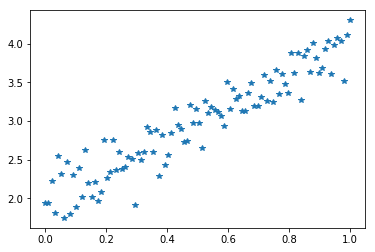

In [55]:
number_points = 100
beta0 = 1
beta1 = 2

epsillon = 0.2

x = np.linspace(0, 1, num=npoints)
y = beta0 + beta1*x + np.random.normal(loc=1, scale=epsillon, size=npoints)

plt.plot(x, y, '*') 

My MSE is 0.047120035764393664


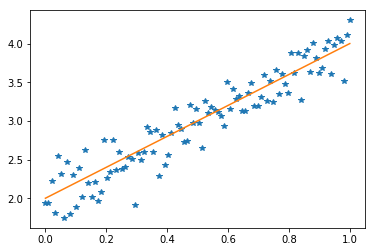

In [56]:
# Guestimate beta0 by observing the value of y when x = 0
beta0 = 2

# Guestimate beta1! Check the slope for guidance
beta1 = 2

y_pred = beta0 + beta1 * x  # y_ped = ... 

# Plot the predicted values as well as the data 
plt.plot(x, y, '*')
plt.plot(x, y_pred, )

# Calculate the MSE
MSE  = np.mean((y-y_pred)**2)  # MSE = ... 

# Print the results 
print("My MSE is", MSE)

In [1]:
# Import the numpy library and name it np
import numpy as np
# Import the pandas library and name it pd
import pandas as pd
# import matplotlib.pyplot
import matplotlib.pyplot as plt
# add the following line in order to have the plots inside the notebook
%matplotlib inline

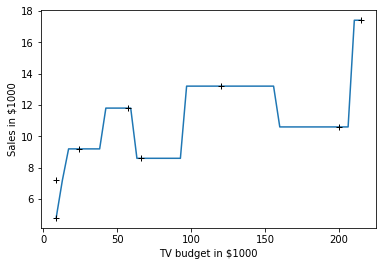

In [2]:
# Data set used in this exercise (Advertising.csv)
data_filename = 'https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/lectures/lecture5/data/Advertising.csv'

# Read Advertising.csv file using pandas libraries:
df = pd.read_csv(data_filename)

# Selecting the columns in data frame as [x,y]
df = df.iloc[5:13]

# Assigning the columns TV and Sales to x and y respectively to simplify the rest of the code
data_x = df.TV
data_y = df.sales
# Here's a function that finds the index of the nearest neighbor and returns the value of the nearest neighbor. Note that this
# is just for k = 1 and the distance function is simply the absolute value.

def find_nearest(df, value):
    data_x = df.TV
    idx = (np.abs(data_x - value)).idxmin()
    return idx, data_x[idx]

# Note that we have used the idxmin method in our function. This is because `array' is a pandas dataframe and idxmin() is designed to
# work with pandas dataframes. If we are working with a numpy array then the appropriate method would be `argmin()'.

# Create some artificial x-values (might not be in the actual dataset)
x = np.linspace(np.min(data_x), np.max(data_x))

# Initialize the y-values to zero
y = np.zeros((len(x)))

# Apply the KNN algorithm.  Try to predict the y-value at a given x-value
# Note: You may have tried to use the `range' method in your code. Enumerate is far better in this case. Try to understand why.
for i, xi in enumerate(x):
    y[i] = data_y[find_nearest(df, xi)[0]]

# Plot your solution
plt.plot(x, y, '-')
# Plot the original data using black x's.
plt.plot(df.TV, df.sales, 'k+')

plt.title('')
plt.xlabel('TV budget in $1000')
plt.ylabel('Sales in $1000')

# To display all figures
plt.show()

In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

reg = LinearRegression().fit(data_x.values.reshape(-1, 1), data_y.values.reshape(-1, 1))
print (reg.coef_, reg.intercept_ )

In [ ]:

# Data set used in this exercise (Advertising.csv)
data_filename = 'https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/lectures/lecture5/data/Advertising.csv'

# Read Advertising.csv file using pandas libraries:
df = pd.read_csv(data_filename)

df = df[['TV','radio','newspaper','sales']]
df_chap3 = df.sample(n=30)

data_x = df_chap3.TV
data_y = df_chap3.sales

X_train, X_test, y_train, y_test = train_test_split(data_x.values.reshape(-1, 1), data_y.values.reshape(-1, 1))

plt.figure(figsize=(14,8))
plt.plot(X_train, y_train, '*r', label="Train")
plt.plot(X_test, y_test, '+b', label="Test")
plt.legend(loc='upper left')
plt.show()

In [ ]:

reg_train = LinearRegression().fit(X_train, y_train)
print ('Train : ',reg_train.coef_, reg_train.intercept_ )

reg_test = LinearRegression().fit(X_test, y_test)
print ('Test : ', reg_test.coef_, reg_test.intercept_ )

beta0_train = reg_train.intercept_
beta1_train = reg_train.coef_

y_pred_train = beta0_train + beta1_train * X_train 

beta0_test = reg_test.intercept_
beta1_test = reg_test.coef_

y_pred_test = beta0_test + beta1_test * X_test 

plt.figure(figsize=(14,8))
plt.plot(X_train, y_train, '*r', label="Train")
plt.plot(X_test, y_test, '+b', label="Test")
plt.plot(X_train, y_pred_train, label="Train fit")
plt.plot(X_test, y_pred_test, label="Test fit")

plt.legend(loc='upper left')

plt.show()

In [ ]:

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import Ridge

# X_train, X_Test, y_train, y_test

degrees = [3,7,12,15,19]# [i for i in range(2,30, 4)]

df_temp = pd.DataFrame(X_train.reshape(22))

for i in range(len(degrees)):
    print (degrees[i])
    
#   df_temp[degrees[i]] = pd.DataFrame((X_train**degrees[i]).reshape(22))

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()

    poly_traing = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression)])
    poly_traing.fit(X_train, y_train)

    pred = poly_traing.predict(y_test)
    
    # Calculate the MSE
    MSE  = np.mean((y_test - pred)**2)

    # Print the results 
    print("My MSE is", MSE)

    linspace = np.linspace(X_train.min(), X_train.max(), y_train.__len__())
    
    plt.plot(X_train, y_train, '*b', label="Train")
    plt.plot(X_test, y_test, '*r', label="Test")
    plt.plot(linspace, poly_traing.predict(linspace[:, np.newaxis]), label="Model")

    plt.legend(loc="best")
    
    plt.show()